In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv('../../datasets/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
x = df[['Age','EstimatedSalary']]
y = df['Purchased']
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

In [5]:
trainx,testx,trainy,testy = train_test_split(scaled_x,y,test_size=.2,random_state=0)

In [6]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(trainx,trainy)

KNeighborsClassifier()

In [22]:
print(confusion_matrix(testy,ypred))

[[55  3]
 [ 1 21]]


In [7]:
ypred = clf.predict(testx)

In [19]:
from sklearn.metrics import plot_confusion_matrix,confusion_matrix

<Figure size 576x1296 with 0 Axes>

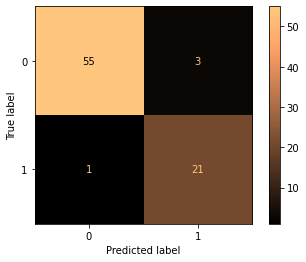

In [20]:
plt.figure(figsize=(8,18))
plot_confusion_matrix(clf,testx,testy,cmap='copper')
plt.show()

## prediction new data from user

In [24]:
age = int(input('What is the age: '))
salary = int(input('What is the salary: '))
data = np.array([[age],[salary]])

In [26]:
scaled_data = scaler.transform(data.reshape(1,-1))

In [31]:
out = clf.predict(scaled_data)[0]

In [32]:
if out==1:print('Purchaser')
else:print('not a buyer')

Purchaser


# KNN of a new datset 

In [58]:
df_iris = sns.load_dataset('iris')

In [59]:
df_iris.columns.to_list()

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [60]:
x = df_iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df_iris['species']
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

In [69]:
trainx,testx,trainy,testy = train_test_split(scaled_x,y,test_size=.2,random_state=0)


In [70]:
iris_clf = KNeighborsClassifier(n_neighbors=5)
iris_clf.fit(trainx,trainy)
iris_clf1 = SVC()
iris_clf1.fit(trainx,trainy)

SVC()

In [71]:
ypred = iris_clf.predict(testx)
ypred1 = iris_clf1.predict(testx)

In [80]:
print('KNN')
print(confusion_matrix(testy,ypred))
print('SVC')
print(confusion_matrix(testy,ypred1))

KNN
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
SVC
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [81]:
ypred = iris_clf.predict(scaled_x)
ypred1 = iris_clf.predict(scaled_x)

In [83]:
print('KNN')
print(confusion_matrix(y,ypred))
print('SVC')
print(confusion_matrix(y,ypred1))

KNN
[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]
SVC
[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]
